In [6]:
import os
import time
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import pandas as pd
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_validate
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.ensemble import (
    AdaBoostRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import ElasticNetCV, SGDRegressor, RidgeCV, LassoLarsCV
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.metrics import (
    explained_variance_score,
    max_error,
    mean_absolute_error,
    mean_squared_error,
)
from sklearn.metrics import (
    mean_squared_log_error,
    median_absolute_error,
    r2_score,
    accuracy_score,
)

In [3]:
data_dir = r"E:\User_Files\OneDrive\Bio-Afterworks\实验报告\2024 S2\生物信息数据挖掘\Res\实验2\数据" # Replace with the path to the PyFeat data directory

In [4]:
os.chdir(data_dir)
os.getcwd()

'E:\\User_Files\\OneDrive\\Bio-Afterworks\\实验报告\\2024 S2\\生物信息数据挖掘\\Res\\实验2\\数据'

In [7]:
data1=pd.read_csv("./training_ALL_NOECYEAST8.csv",sep='\t')
data2=pd.read_csv("./training_MIN_NOECYEAST8.csv",sep='\t')
data3=pd.read_csv("./training_YPD_NOECYEAST8.csv",sep='\t')

In [8]:
data1.shape,data2.shape,data3.shape,

((4445, 94), (4262, 94), (4193, 94))

In [9]:
objnames=[data1,data2,data3]
dataset=[]
for dt in objnames:
    dataset.append((dt.iloc[:,3:].values,np.log1p(dt['Median molecules per cell'].values).reshape((-1,1))))
dataset

[(array([[20.        ,  0.22787714,  0.5138    , ..., 51.85628743,
          47.66467066,  9.93865031],
         [20.        ,  0.24213129,  0.5508    , ..., 46.5497076 ,
          53.33333333, 13.31719128],
         [20.        ,  0.19979066,  0.614     , ..., 45.19230769,
          52.16346154,  3.7593985 ],
         ...,
         [42.67543199,  0.23430414,  0.4095    , ..., 48.89705882,
          51.83823529, 30.19230769],
         [41.48925514,  0.22225243,  0.4506    , ..., 42.37288136,
          49.49152542, 34.26573427],
         [37.62649346,  0.28609985,  0.3619    , ..., 45.69215876,
          53.43659245, 47.94383149]]),
  array([[5.86962247],
         [5.60580207],
         [6.93731408],
         ...,
         [7.11889492],
         [7.05427321],
         [5.91862048]])),
 (array([[20.        ,  0.22787714,  0.5138    , ..., 51.85628743,
          47.66467066,  9.93865031],
         [20.        ,  0.24213129,  0.5508    , ..., 46.5497076 ,
          53.33333333, 13.31719128

In [10]:
res=[]
label_0=[]
for X,_ in dataset:
    model=KMeans(n_clusters=2)
    model.fit(X)
    pre_y=model.labels_#获取训练后的 KMeans 模型对当前样本的聚类结果，即每个样本所属的簇标签。
    s=silhouette_score(X,pre_y,sample_size=len(X),metric='euclidean')
    res.append(s)
print(res)

[0.621711339859668, 0.6224734691324089, 0.6214320224384886]


## 作业 1

In [11]:
data3

,Protein(Ensembl),Standard Name,Median molecules per cell,iCUB,tAI,T3s,C3s,A3s,G3s,CAI_CODONW,...,%C3,%T3,%G3,%G3+C3,%G3+A3,%G3+T3,%A3+T3,%A3+C3,%C3+T3,%G3s+C3s
0,Q0050,AI1,275.077938,20.000000,0.227877,0.5138,0.0639,0.6199,0.0731,0.123,...,5.269461,42.395210,5.748503,11.017964,52.335329,48.143713,88.982036,51.856287,47.664671,9.938650
1,Q0055,AI2,5.425417,20.000000,0.242131,0.5508,0.0932,0.5525,0.0861,0.156,...,7.719298,45.614035,7.836257,15.555556,46.666667,53.450292,84.444444,46.549708,53.333333,13.317191
2,Q0060,AI3,1029.000000,20.000000,0.199791,0.6140,0.0205,0.6282,0.0329,0.122,...,1.682692,50.480769,4.326923,6.009615,47.836538,54.807692,93.990385,45.192308,52.163462,3.759398
3,Q0065,AI4,58.683181,20.000000,0.227440,0.5229,0.0479,0.6540,0.0328,0.121,...,3.949731,43.087971,4.308797,8.258528,52.962298,47.396768,91.741472,52.603232,47.037702,6.203008
4,Q0140,VAR1,3973.295137,44.040868,0.143927,0.7249,0.0258,0.5714,0.0486,0.089,...,2.255639,63.408521,2.255639,4.511278,34.335840,65.664160,95.488722,34.335840,65.664160,4.071247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,YPR189W,SKI3,5379.370745,34.092577,0.267476,0.4672,0.1896,0.4340,0.2307,0.148,...,14.305652,35.240754,18.283322,32.588974,50.453594,53.524075,67.411026,46.475925,49.546406,30.475504
4189,YPR190C,RPC82,4996.159632,40.638423,0.305205,0.3587,0.2064,0.4434,0.2515,0.149,...,15.725191,27.328244,21.526718,37.251908,56.946565,48.854962,62.748092,51.145038,43.053435,35.433071
4190,YPR196W,YPR196W,7.480814,45.073364,0.218408,0.4557,0.2057,0.3836,0.2578,0.120,...,16.772824,37.154989,19.957537,36.730361,46.072187,57.112527,63.269639,42.887473,53.927813,34.000000
4191,YPR198W,SGE1,991.719640,42.675432,0.234304,0.4095,0.1983,0.4314,0.1884,0.096,...,16.911765,34.926471,16.176471,33.088235,48.161765,51.102941,66.911765,48.897059,51.838235,30.192308


In [12]:
pre_y_3=pre_y
import pandas as pd
data3['KM'] = pre_y_3
data3
name = data3.iloc[:, 0]
KM = data3['KM']
df1 = pd.DataFrame({'name': name, 'KM': KM})
print(df1)

         name  KM
0       Q0050   1
1       Q0055   1
2       Q0060   0
3       Q0065   0
4       Q0140   0
...       ...  ..
4188  YPR189W   1
4189  YPR190C   0
4190  YPR196W   0
4191  YPR198W   0
4192  YPR204W   1

[4193 rows x 2 columns]


In [13]:
name = df1['name']
KM= df1['KM']
name0 = name[KM == 0]  # 第二列为 0 的数据
name1 = name[KM == 1]  # 第二列为 1 的数据
print(name0)
print(name1)

2         Q0060
3         Q0065
4         Q0140
7       YAL003W
8       YAL005C
         ...   
4186    YPR187W
4187    YPR188C
4189    YPR190C
4190    YPR196W
4191    YPR198W
Name: name, Length: 3312, dtype: object
0         Q0050
1         Q0055
5       YAL001C
6       YAL002W
18      YAL017W
         ...   
4167    YPR164W
4182    YPR181C
4184    YPR185W
4188    YPR189W
4192    YPR204W
Name: name, Length: 881, dtype: object


In [14]:
df2 = data3.iloc[:, [0, 2]]
df2_sorted = df2.sort_values(by=df2.columns[1], ascending=False)
print(df2_sorted)

     Protein(Ensembl)  Median molecules per cell
222           YBR118W              611192.841299
4109          YPR080W              291691.101487
8             YAL005C              262450.500000
2485          YLL024C              185858.422435
2674          YLR249W              172751.212100
...               ...                        ...
1612          YGR249W                   4.013483
2039          YJL093C                   3.804228
3069          YMR191W                   3.359783
145           YBL106C                   2.945467
982           YDR501W                   2.197335

[4193 rows x 2 columns]


In [15]:
top_10_percent = int(len(df2_sorted) * 0.1)
top_10_data = df2_sorted.head(top_10_percent)
last_10_data = df2_sorted.tail(top_10_percent)
print("Top 10 percent:")
print(top_10_data)
print("\nLast 10 Percent:")
print(last_10_data)

Top 10 percent:
     Protein(Ensembl)  Median molecules per cell
222           YBR118W              611192.841299
4109          YPR080W              291691.101487
8             YAL005C              262450.500000
2485          YLL024C              185858.422435
2674          YLR249W              172751.212100
...               ...                        ...
2858          YML048W               11869.410734
3196          YNL044W               11865.591670
544           YDL125C               11846.440664
104           YBL050W               11753.784790
1406          YGL200C               11721.501456

[419 rows x 2 columns]

Last 10 Percent:
     Protein(Ensembl)  Median molecules per cell
1762          YHR124W                 440.834490
2389          YKL219W                 440.834490
874           YDR350C                 440.834490
809           YDR255C                 440.834490
157           YBR021W                 439.151265
...               ...                        ...
1612       

****************************
{'YOL127W', 'YNR035C', 'YML012W', 'YGL106W', 'YMR230W', 'YBL050W', 'YHL001W', 'YMR314W', 'YDR032C', 'YPL237W', 'YJR045C', 'YOL154W', 'YKL071W', 'YLR344W', 'YPR028W', 'YCR031C', 'YMR290C', 'YBR189W', 'YDR033W', 'YDL140C', 'YKL196C', 'YJR094W-A', 'YMR235C', 'YDL229W', 'YOR122C', 'YJR065C', 'YNL244C', 'YCR088W', 'YIL133C', 'YNL135C', 'YNL231C', 'YDR418W', 'YHR141C', 'YDR064W', 'YLR216C', 'YPL106C', 'YLR378C', 'YDL191W', 'YMR012W', 'YJL001W', 'YLL050C', 'YGL195W', 'YGR118W', 'YLR048W', 'YML078W', 'YOR293W', 'YMR241W', 'YHL033C', 'YOR117W', 'YIL075C', 'YHR021C', 'YKL056C', 'YOR230W', 'YML048W', 'YIL142W', 'YDL184C', 'YLR406C', 'YBL072C', 'YLR042C', 'YER177W', 'YNL015W', 'YGL137W', 'YPR016C', 'YGR214W', 'YDL084W', 'YJL177W', 'YIL069C', 'YDR374W-A', 'YLR287C-A', 'YPL249C-A', 'YGL255W', 'YDL097C', 'YAL003W', 'YKL081W', 'YGL048C', 'YDR129C', 'YGR285C', 'YGL206C', 'YGR086C', 'YDR025W', 'YLL026W', 'YDL081C', 'YNL208W', 'YNL134C', 'YBR031W', 'YLR367W', 'YNL209W', 'YLR1

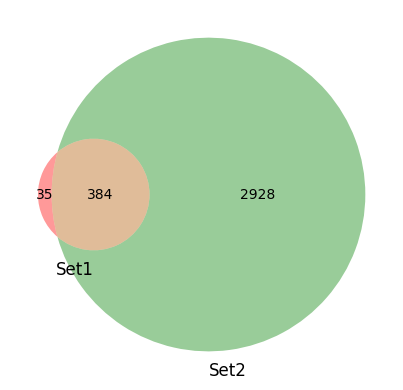

In [17]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2


set1 = set(top_10_data.iloc[:,0])
print('****************************')
print(set1)
set2 = set(name0)
print('****************************')
print(name1)
venn2([set1, set2], ('Set1', 'Set2'))
plt.show()

In [18]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

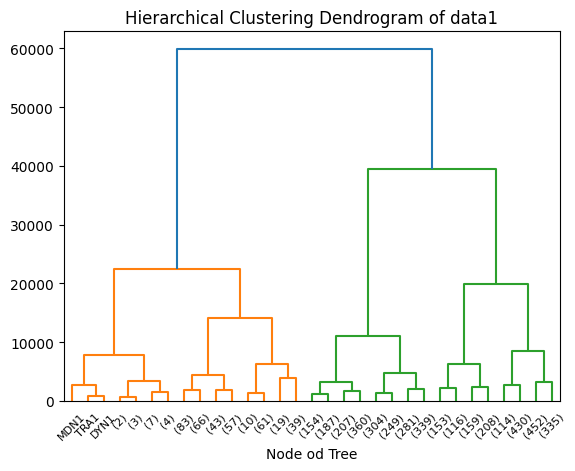

In [19]:
def plot_dendrogram(model,**kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples=len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count=0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1
            else:
                current_count+=counts[child_idx-n_samples]
        counts[i]=current_count
    linkage_matrix=np.column_stack([model.children_,model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix,**kwargs)
X,_=dataset[0]
model =AgglomerativeClustering(distance_threshold=2,n_clusters=None)
model=model.fit(X)
plt.title('Hierarchical Clustering Dendrogram of data1')
plot_dendrogram(model,truncate_mode='level',p=4,labels=data1['Standard Name'].to_list())
plt.xlabel("Node od Tree")
plt.show()

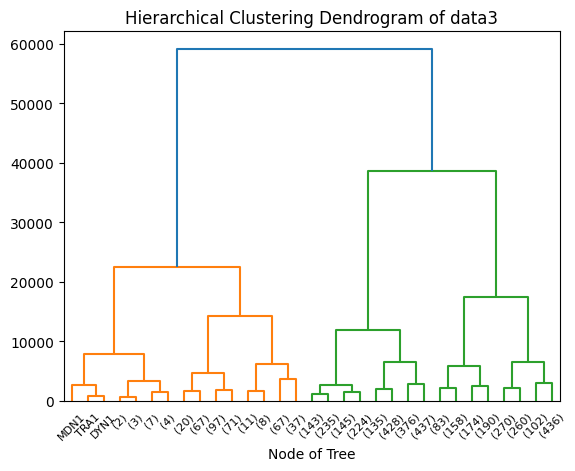

AgglomerativeClustering()


In [20]:
X,_=dataset[2]
model =AgglomerativeClustering(distance_threshold=2,n_clusters=None)
model=model.fit(X)
plt.title('Hierarchical Clustering Dendrogram of data3')
plot_dendrogram(model,truncate_mode='level',p=4,labels=data3['Standard Name'].to_list())
plt.xlabel("Node of Tree")
plt.show()

model=AgglomerativeClustering(distance_threshold=None,n_clusters=2)
model=model.fit(X)
print(model.fit(X))

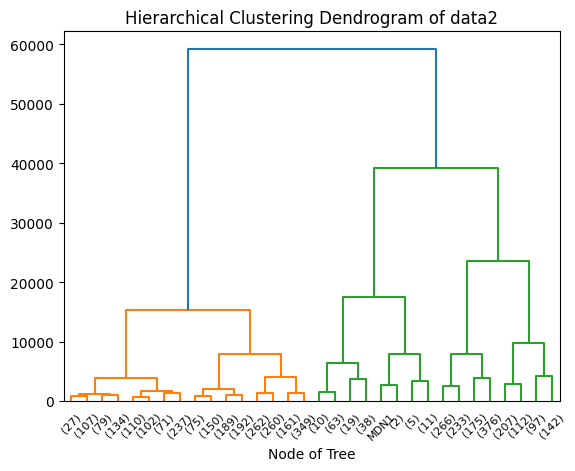

In [21]:
X,_=dataset[1]
model =AgglomerativeClustering(distance_threshold=2,n_clusters=None)
model=model.fit(X)
plt.title('Hierarchical Clustering Dendrogram of data2')
plot_dendrogram(model,truncate_mode='level',p=4,labels=data2['Standard Name'].to_list())
plt.xlabel("Node of Tree")
plt.show()